# Support Vector Machines Assignment
## Salary data

Prepare a classification model using SVM for salary data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
train_data = pd.read_csv('SalaryData_Train(1).csv')
test_data = pd.read_csv('SalaryData_Test(1).csv')

### Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work
- education	-- Education of an individuals
- maritalstatus -- Marital status of an individulas
- occupation	 -- occupation of an individuals
- relationship --
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week
- native -- Native of an individual
- Salary -- salary of an individual

In [8]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
train_data.duplicated().sum()

3258

In [11]:
train_data.drop_duplicates(inplace=True)

In [12]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [13]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
test_data.duplicated().sum()

930

In [15]:
test_data.drop_duplicates(inplace=True)

Encoding our target column Salary

In [16]:
le = LabelEncoder()
train_data['Salary'] = le.fit_transform(train_data['Salary'])
test_data['Salary'] = le.transform(test_data['Salary'])

### Data Visualization
We will joining both datasets for visualization

In [17]:
all_data = pd.concat([train_data,test_data],axis=0)

##### Distribution of Age and Hours per week

(0.0, 9000.0)

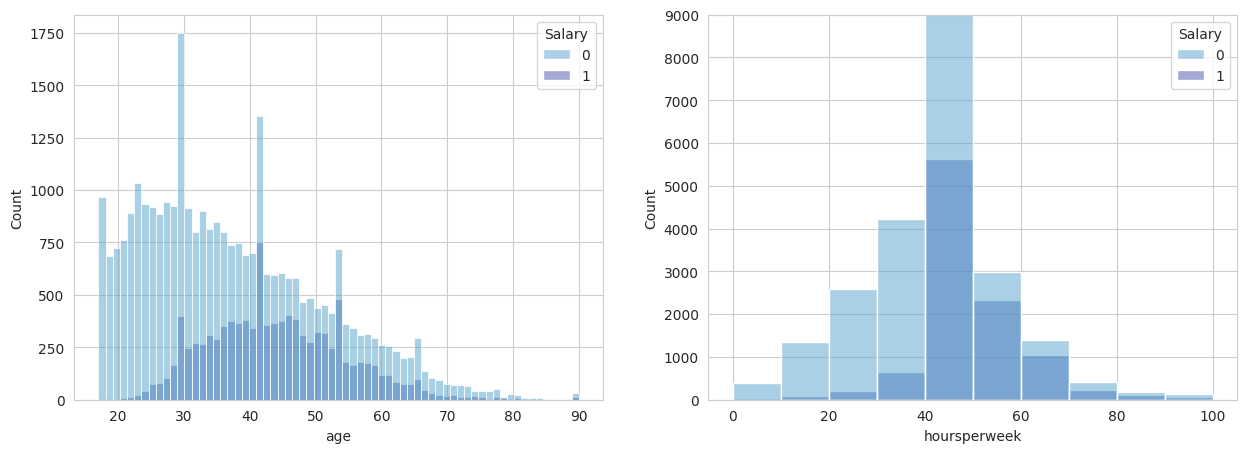

In [18]:
figs, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.histplot(data=all_data,x='age',hue='Salary',ax=axes[0])
sns.histplot(data=all_data,x='hoursperweek',hue='Salary',bins=[0,10,20,30,40,50,60,70,80,90,100],ax=axes[1])
axes[1].set_ylim([0,9000])

##### Comparing counts of Salary within each categories of Race and Sex
From the bar plots below, we can conclude White people and Males have more share of high salaries than others

<Axes: xlabel='Salary', ylabel='count'>

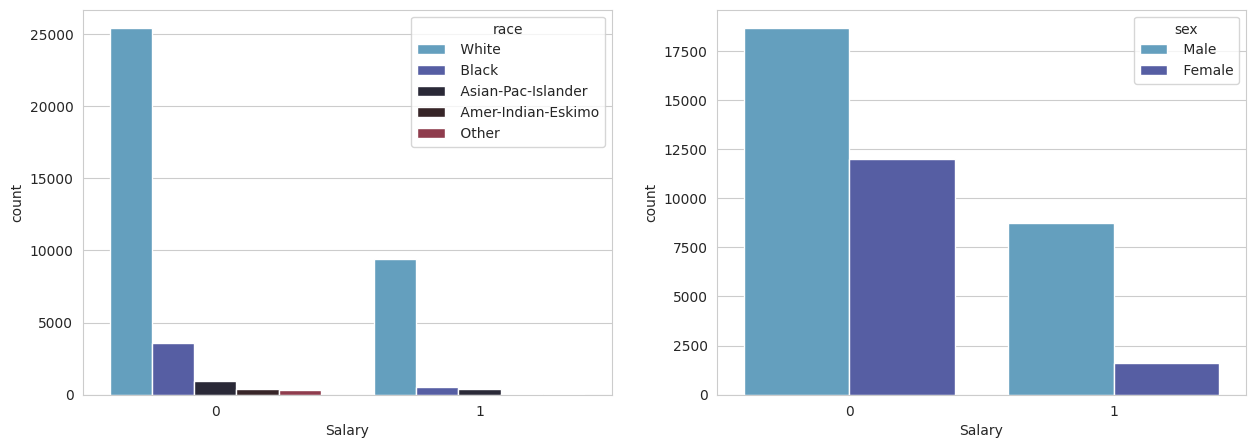

In [19]:
figs, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(data=all_data,x='Salary',hue='race',ax=axes[0])
sns.countplot(data=all_data,x='Salary',hue='sex',ax=axes[1])

Creating custom function to plot categorical variables with percentage of high salary for each category

In [20]:
def plot_by_percentage(column,figsize=(8,5),kind='bar'):
    percentage = all_data.groupby(column)['Salary'].mean().sort_values(ascending=False)*100
    plt.figure(figsize=figsize)
    if kind=='bar':
        sns.barplot(y=percentage.index,x=percentage.values,palette='icefire')
    elif kind=='pie':
        lst = [0.1]
        for i in range(all_data[column].nunique()-1): lst.append(0)
        plt.figure(figsize=figsize)
        ax = plt.subplot(111)
        pd.DataFrame(percentage).plot.pie(y='Salary', legend=False, autopct='%1.1f%%',explode=tuple(lst),shadow=True,startangle=0,ax=ax)

#### Work class
People with self employed company are most likely to have high salary

<Figure size 1000x1000 with 0 Axes>

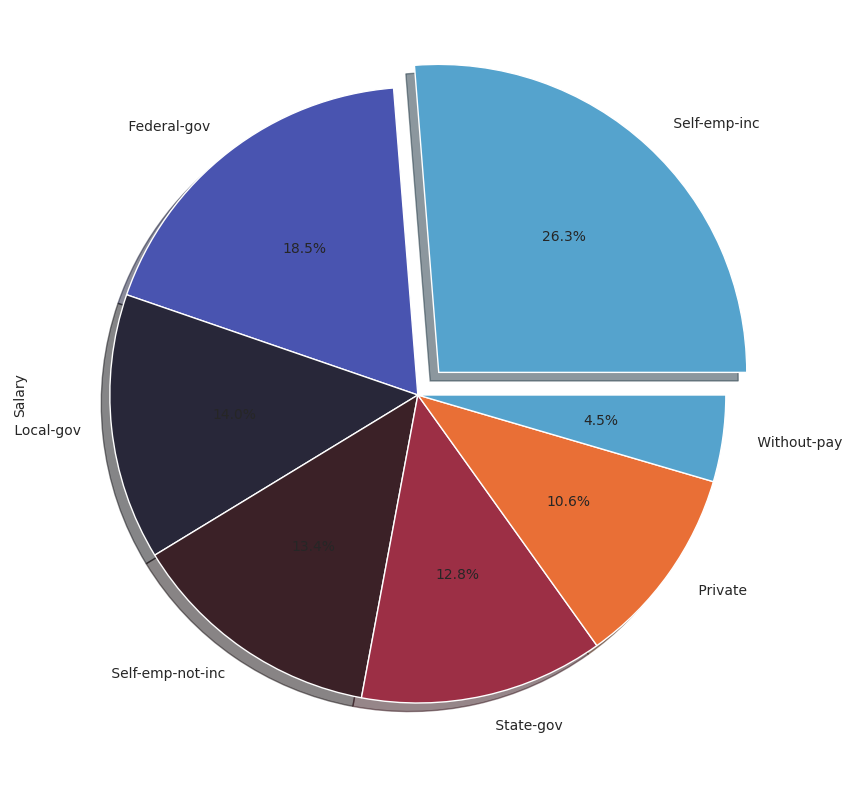

In [21]:
plot_by_percentage('workclass',kind='pie',figsize=(10,10))

##### Education
Being School Proffesor is safe way to achieve high salary

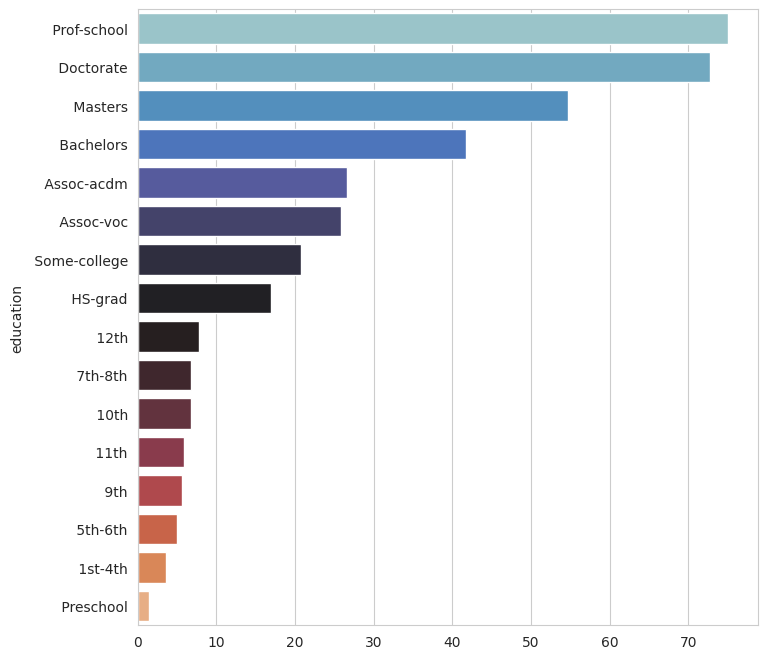

In [22]:
plot_by_percentage('education',figsize=(8,8))

##### Marital Status and Relationship
Married with civilian spouse and Wife are the more Salary makers by percentage

<Figure size 1000x1000 with 0 Axes>

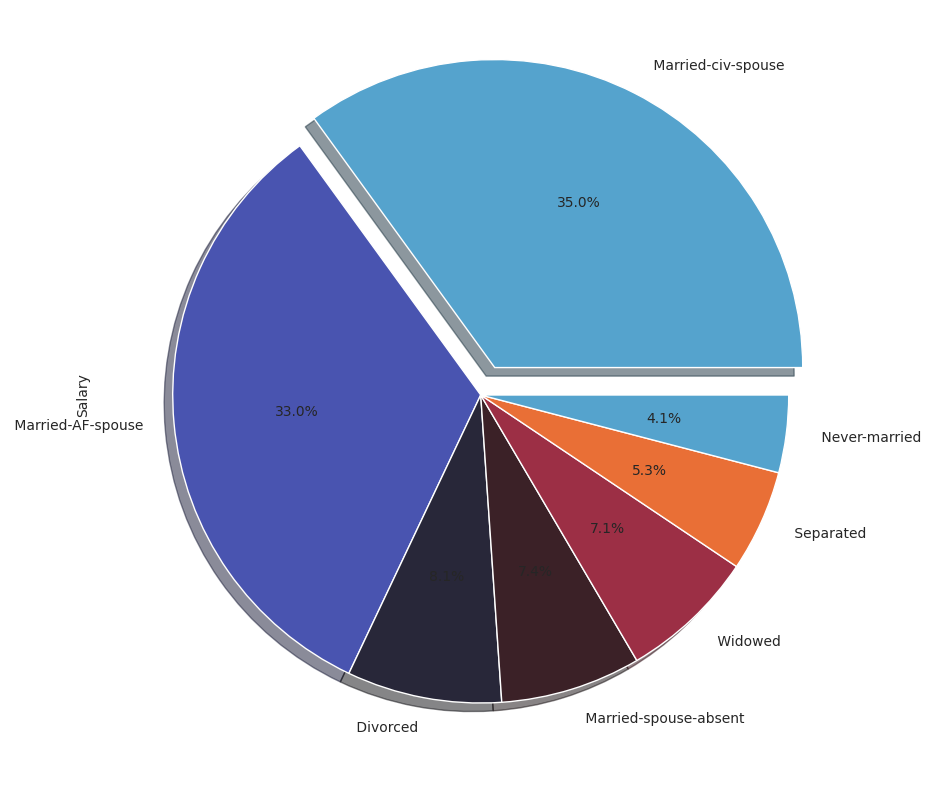

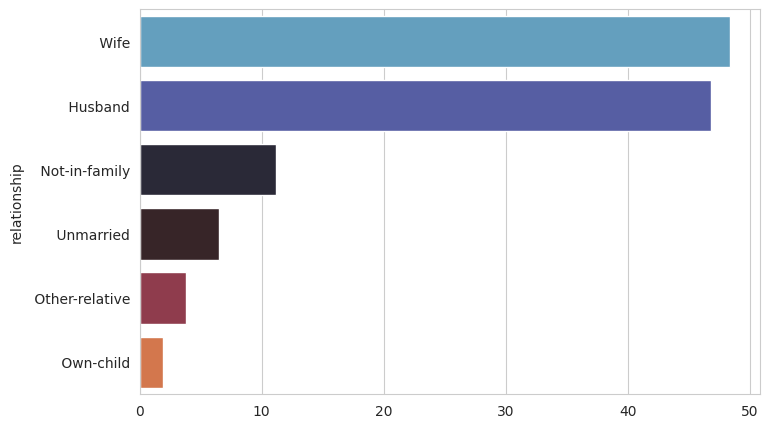

In [23]:
plot_by_percentage('maritalstatus',kind='pie',figsize=(10,10))
plot_by_percentage('relationship')

##### Occupation

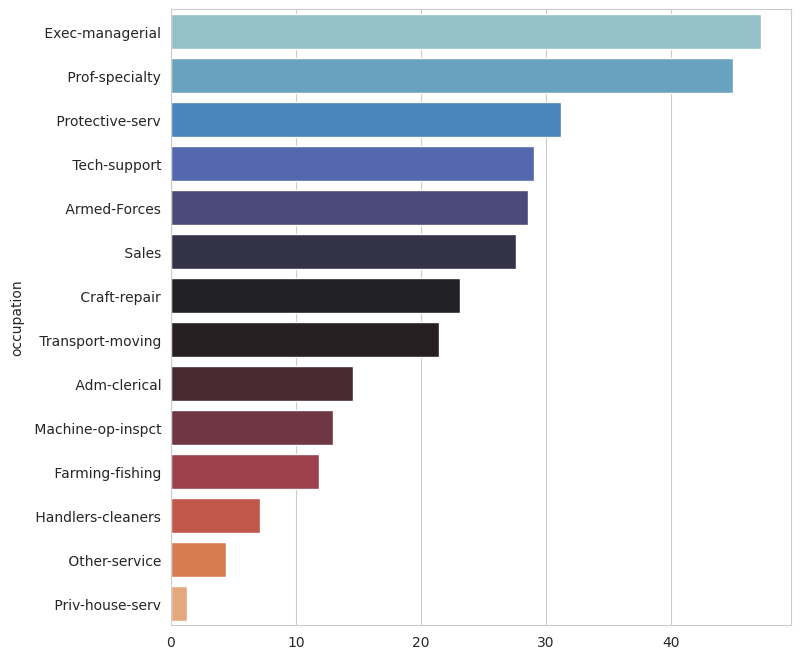

In [24]:
plot_by_percentage('occupation',figsize=(8,8))

##### Native Country

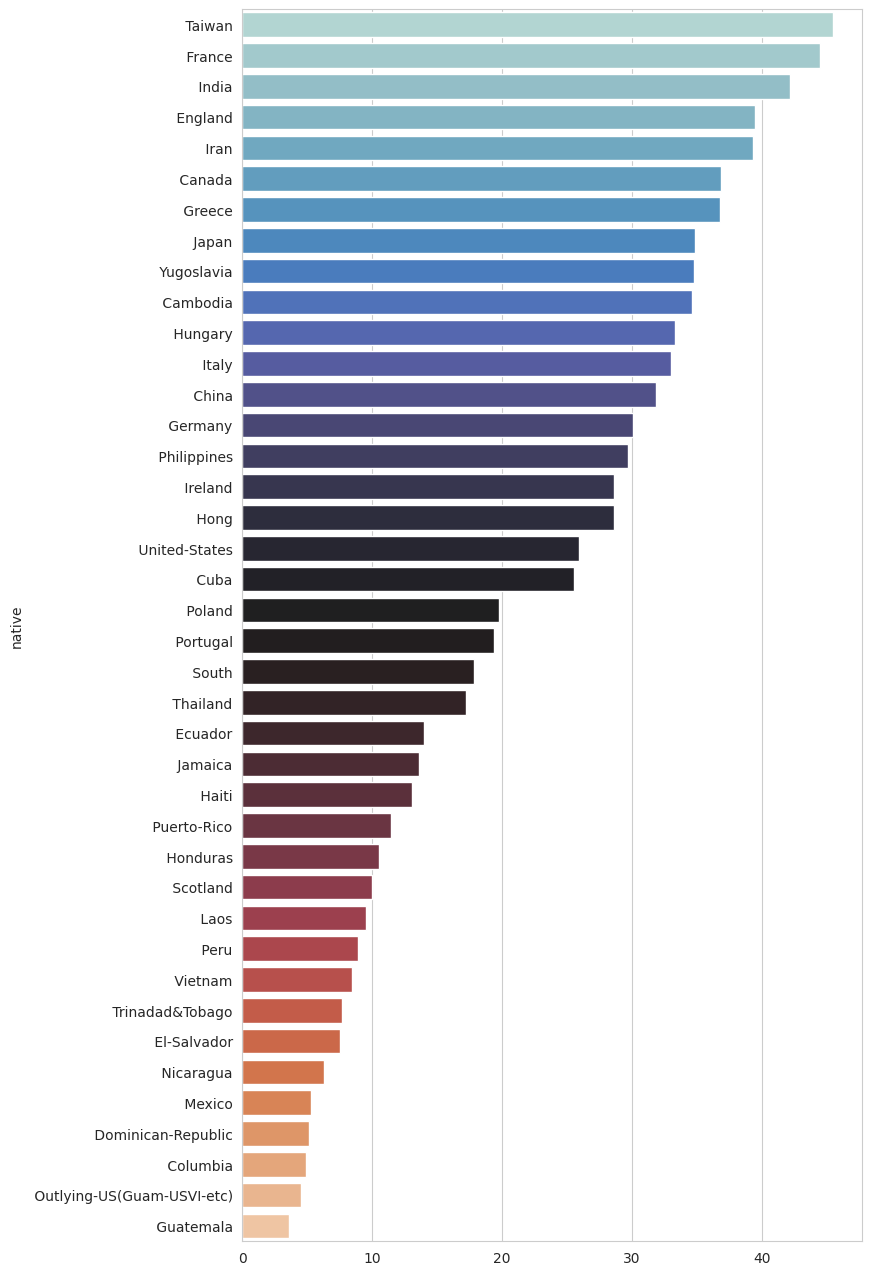

In [25]:
plot_by_percentage('native',figsize=(8,16))

### Preparing data for model building
Dropping unnecessary columns

In [26]:
train_data.drop('education',axis=1,inplace=True)
test_data.drop('education',axis=1,inplace=True)

Label Encoding categorical variables

In [27]:
for col in ['workclass','maritalstatus','occupation','relationship','race','sex','native']:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

Splitting the data

In [28]:
x_train, x_test = train_data.drop('Salary',axis=1), test_data.drop('Salary',axis=1)
y_train, y_test = train_data['Salary'], test_data['Salary']

### Parameter Tuning

**C**
- default value is 1.0
- Regularization parameter. The strength of the regularization is inversely proportional to C.
- Must be strictly positive.
- We will be considering [10,1,0.1]

**kernel**
- defualt values is 'rbf'
- Specifies the kernel type to be used in the algorithm.
- Possible values:
    - 'linear'
    - 'poly'
    - 'rbf'
    - 'sigmoid'
    - 'precomputed'
    - [callable]
- Due to large computational time we will go with default

**gamma**
- default value is 'scale'
- Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
- Possible values:
    - 'scale', gamma = 1 / (n_features * X.var())
    - ‘auto’, gamma = 1 / n_features
    - float, must be non-negative.
- We will be considering ['scale','auto']

In [29]:
param_grid = {'C':[10,1,0.1],'gamma': ['scale','auto']}

In [30]:
svm = SVC()
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 1, 0.1], 'gamma': ['scale', 'auto']})

In [31]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'gamma': 'auto'}
Best score:  0.8069359145389015


### Using best parameter found to make final model

In [32]:
classifier = SVC(C=1,gamma='auto')
classifier.fit(x_train,y_train)

SVC(C=1, gamma='auto')

Testing model on test data

In [33]:
y_pred = classifier.predict(x_test)

Confusion matrix

In [34]:
confusion_matrix(y_test,y_pred)

array([[10064,   556],
       [ 2003,  1507]])

Accuracy

In [35]:
accuracy_score(y_pred,y_test)*100

81.8895966029724